# AVIATION DATA ANAYLSIS

## Introduction

In this notebook, I will be analysing the Aviation data form this [Kaggle dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) in order do achieve the following:

- To give three business recommendations for the business 
- Communicating my work 
- Using plenty of visualizations



In [75]:
#Importing the necesary libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [76]:
#Loading the data into the notebook 
#using the latin1 encoding to avoid the UnicodeDecodeError
df = pd.read_csv('AviationData.csv', encoding='latin1')

df.head()

c:\Users\CINDY\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [77]:
#Looking at the columns of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [78]:
#Looking at the statistical measures of the dataframe
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [79]:
#Look at the shape of the dataframe
df.shape

(88889, 31)

### Addressing Missing Value in columns

In [80]:
#Looking at the number of missing values in the dataframe
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

### Description of the data

From the code above we can see the data has a number of missing value particularly in the following columns:
- Air.carrier
- Schedule
- Latitude
- Longitude
- Aircraft.Category

Depending in the use case of these column we will decide whether to drop them or to alter them for later use. Let's look into them *further*


In [81]:
#Percentage of missing values in the dataframe
percentage_missing =  round(df.isnull().sum() * 100 / len(df), 2)
#sorting the percentage of missing values in descending order
sorted_percentage_missing = percentage_missing.sort_values(ascending=False)
#preview the sorted dataframe
sorted_percentage_missing


Schedule                  85.85
Air.carrier               81.27
FAR.Description           63.97
Aircraft.Category         63.68
Longitude                 61.33
Latitude                  61.32
Airport.Code              43.47
Airport.Name              40.61
Broad.phase.of.flight     30.56
Publication.Date          15.49
Total.Serious.Injuries    14.07
Total.Minor.Injuries      13.42
Total.Fatal.Injuries      12.83
Engine.Type                7.96
Report.Status              7.18
Purpose.of.flight          6.97
Number.of.Engines          6.84
Total.Uninjured            6.65
Weather.Condition          5.05
Aircraft.damage            3.59
Registration.Number        1.48
Injury.Severity            1.12
Country                    0.25
Amateur.Built              0.11
Model                      0.10
Make                       0.07
Location                   0.06
Event.Date                 0.00
Accident.Number            0.00
Investigation.Type         0.00
Event.Id                   0.00
dtype: f

### Let us visualize these percentages using a barchart


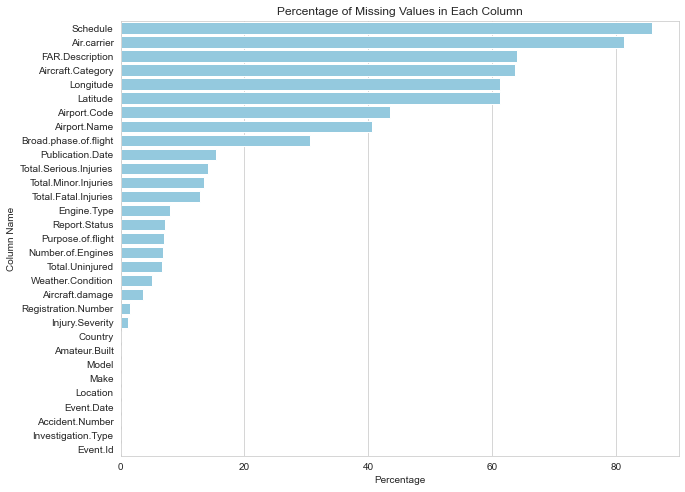

In [82]:
#Plotting the percentage of missing values in each column
#setting the style of the plot
sns.set_style('whitegrid')
#setting the size of the plot
fig, ax = plt.subplots(figsize=(10, 8))

#plotting the percentage of missing values in each column a horizontal bar plot
sns.barplot(x=sorted_percentage_missing.values, y=sorted_percentage_missing.index, color='skyblue', orient='h')
#setting the title and axis labels of the plot
ax.set_title('Percentage of Missing Values in Each Column')
ax.set_ylabel('Column Name')
ax.set_xlabel('Percentage');


In [83]:
#Dropping the columns with more than 60% missing values
#create a new dataframe that does not contain columns that contain missing values of more than 60%
df = df.drop(axis=1, labels=sorted_percentage_missing[sorted_percentage_missing > 60].index)
#checking to see if the columns have been removed
df.isnull().sum()


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: int64

### Let's now look at the dataframe columns individually and clean where necesarry.  

In [50]:
#First view all the columns and check for inconsistencies in the values
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

### Replacing missing values with none in the `Airport.Code` and `Airport.Name` column

In [84]:
#convert all values into uppercase
df['Airport.Code'] = df['Airport.Code'].map(lambda x: str(x).upper())
#replace null values with the none category
df['Airport.Code'] = df['Airport.Code'].fillna('NONE')
#replace the 'NAN' category with the none category
df['Airport.Code'] = df['Airport.Code'].replace('NAN', 'NONE')


In [85]:
#confirm changes
df['Airport.Code'].value_counts()

7MI2    1
KWEA    1
KATS    1
OSD9    1
29X     1
CR1     1
MT48    1
1WI7    1
TE33    1
LCTF    1
OPQT    1
D75     1
4IN8    1
SZX     1
BHC     1
2MOO    1
XL      1
5A8     1
C-18    1
MV1     1
Name: Airport.Code, dtype: int64

In [86]:
#convert all values into title case
df['Airport.Name'] = df['Airport.Name'].map(lambda x: str(x).title().strip())
#replace null values with the none category
df['Airport.Name'] = df['Airport.Name'].replace('Nan', 'None')
#condense the private categories into one category
df['Airport.Name'] = df['Airport.Name'].replace('Private Airstrip', 'Private')
df['Airport.Name'] = df['Airport.Name'].replace('Private Strip', 'Private')
#replace 'Unknown' category with 'None'
df['Airport.Name'] = df['Airport.Name'].replace('Unknown', 'None')

In [87]:
#confirm changes
df['Airport.Name'].value_counts()

None                              36407
Private                             898
Merrill Field                       109
Centennial                          102
Van Nuys                             97
                                  ...  
Atkinson Municipal Airport            1
Antonio Rivera Rodriguez              1
Burlington Muni.                      1
Fresno-Chandler Downtown Airpo        1
Ketchikan Intn'L                      1
Name: Airport.Name, Length: 21563, dtype: int64

### Replacing similar values 

The `Make` column has similar names such as 'Cessna' and 'CESSNA'. 
Let us replace these values so we are left with only unique values

In [88]:
#Checking the number of unique values in each column
#The make column has some inconsistencies in the values
df['Make'].value_counts()

Cessna                           22227
Piper                            12029
CESSNA                            4922
Beech                             4330
PIPER                             2841
                                 ...  
LAMMERS SJEF J                       1
CLEVENGER JIMMIE B                   1
SACCIO THOMAS A                      1
Bellanca Aircraft Corporation        1
Huffman                              1
Name: Make, Length: 8237, dtype: int64

In [89]:
#Replace the values in the Make column that are similar
#convert all the values into title format 
df['Make'] = df['Make'].map(lambda x: str(x).title())

In [90]:
#check the make column to ensure all values are unique and in title case
df['Make'].value_counts()

Cessna                      27149
Piper                       14870
Beech                        5372
Boeing                       2745
Bell                         2722
                            ...  
James O'Bert                    1
Sonex Limited                   1
Flower Roger P                  1
Thompson Bruce D                1
Evektor-Aerotechnik A.S.        1
Name: Make, Length: 7588, dtype: int64

#### The `Location` column has some inconsistencies
Let us make all the locations uppercase and align them to the left. 
lso remove any trailing whitespaces and remove null values

In [91]:
df['Location'].value_counts()

ANCHORAGE, AK       434
MIAMI, FL           200
ALBUQUERQUE, NM     196
HOUSTON, TX         193
CHICAGO, IL         184
                   ... 
Manchester, CT        1
NEW PHILA, OH         1
SHARON, VT            1
Summersville, MO      1
SMITHFIELD, VA        1
Name: Location, Length: 27758, dtype: int64

In [92]:
#Convert all the values in the Location column to uppercase, remove any trailing whitespaces and align them to the left
df['Location'] = df['Location'].map(lambda x: str(x).upper().strip().ljust(20))
#confirm the changes
df['Location'].value_counts()

ANCHORAGE, AK                        548
MIAMI, FL                            275
HOUSTON, TX                          271
ALBUQUERQUE, NM                      265
CHICAGO, IL                          256
                                    ... 
MPUMALANGA PROVINCE, SOUTH AFRICA      1
ROHN, AK                               1
NARANJAL, SPAIN                        1
RICHMOND NSW, AUSTRALIA                1
LILLO, SPAIN                           1
Name: Location, Length: 21978, dtype: int64

#### Change the values in the `Country` column to title case and get rid of null records if any

In [93]:
#Convert the values in the Country column to title case
df['Country'] = df['Country'].map(lambda x: str(x).title())
#check for null values in the Country column
df['Country'].isnull().sum()

0

#### Fill the null values in the `Aircraft.damage` column with the unknown category

In [94]:
#fill the null values in the Aircraft.damage column with the unknown value
df['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown')
#confirm the changes
df['Aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
Unknown         3313
Minor           2805
Name: Aircraft.damage, dtype: int64


#### The `Registration.Number` column has several null values named in different ways. Rename these null values and delete them

In [95]:
#Find out the values that are null 
df['Registration.Number'].value_counts().head(20)

NONE       344
UNREG      126
None        65
UNK         13
USAF         9
N20752       8
N11VH        6
N5408Y       6
unknown      6
N53893       6
N121CC       6
N4101E       6
N8402K       6
N9957J       5
N5246E       5
N420SB       5
USN          5
N99HV        5
N3125N       5
N8597D       5
Name: Registration.Number, dtype: int64

In [96]:
#Convert the values in the Registration.Number column to title case, remove any trailing whitespaces 
df['Registration.Number'] = df['Registration.Number'].map(lambda x: str(x).title().strip())
#Replace the None, Nan, Unk, Unreg, Usaf values with Unknown
df['Registration.Number'].replace('None', 'Unknown', inplace=True)
df['Registration.Number'].replace('Nan', 'Unknown', inplace=True)
df['Registration.Number'].replace('Unk', 'Unknown', inplace=True)
df['Registration.Number'].replace('Unreg', 'Unknown', inplace=True)
df['Registration.Number'].replace('Usaf', 'Unknown', inplace=True)
#confirm the changes
df['Registration.Number'].value_counts()

Unknown    1892
N20752        8
N121Cc        6
N53893        6
N4101E        6
           ... 
N6528K        1
N557Ap        1
N85Pr         1
N5555T        1
N71Ta         1
Name: Registration.Number, Length: 79090, dtype: int64

In [97]:
#Check for null values
df['Registration.Number'].isnull().sum()

0

#### The `Number.of.Engines` column has multiple null values and its a float 
Convert the column values into integers and remove the null values 

In [98]:
df['Number.of.Engines'].isnull().sum()

6084

In [99]:
#fill the null values with the mode 
#get the mode
engines_mode = df['Number.of.Engines'].mode().values[0]
#fill the null values
df['Number.of.Engines'] = df['Number.of.Engines'].fillna(engines_mode)
#confirm the changes
df['Number.of.Engines'].isnull().sum()

0

#### Cleaning the `Engine.Type` column
Replacing all null values of the column and removing them

In [100]:
df['Engine.Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
UNK                    1
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

In [101]:
#Convert the values in the Engine.Type column to title case
df['Engine.Type'] = df['Engine.Type'].map(lambda x: str(x).title())
#confirm the changes
df['Engine.Type'].value_counts()

Reciprocating      69530
Nan                 7077
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  21
Geared Turbofan       12
Electric              10
Lr                     2
Unk                    1
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

In [102]:
#fill the null values in the Engine.Type column with the unknown value
df['Engine.Type'] = df['Engine.Type'].fillna('Unknown')
#confirm the changes
df['Engine.Type'].value_counts()

Reciprocating      69530
Nan                 7077
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  21
Geared Turbofan       12
Electric              10
Lr                     2
Unk                    1
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

In [103]:
#change the 'None', 'Unk', 'Nan' and 'Unknown' values to 'NaN'
df['Engine.Type'].replace('None', 'Unknown', inplace=True)
df['Engine.Type'].replace('Unk', 'Unknown', inplace=True)
df['Engine.Type'].replace('Nan', 'Unknown', inplace=True)
#confirm the changes
df['Engine.Type'].value_counts()

Reciprocating      69530
Unknown             9150
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Turbo Jet            703
Geared Turbofan       12
Electric              10
Lr                     2
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

#### Converting the `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `'Total.Minor.Injuries'`,` 'Total.Uninjured',` column values into integers

In [104]:
#fill the null values in the Total.Fatal.Injuries column with 0
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0.0)
#confirm the changes
df['Total.Fatal.Injuries'].value_counts()

0.0      71076
1.0       8883
2.0       5173
3.0       1589
4.0       1103
         ...  
31.0         1
169.0        1
150.0        1
117.0        1
156.0        1
Name: Total.Fatal.Injuries, Length: 125, dtype: int64

In [105]:
#fill the null values in the Total.Serious.Injuries column with 0
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(0.0)
#confirm the changes
df['Total.Serious.Injuries'].value_counts()

0.0      75799
1.0       9125
2.0       2815
3.0        629
4.0        258
5.0         78
6.0         41
7.0         27
9.0         16
8.0         13
10.0        13
13.0         9
11.0         6
26.0         5
14.0         5
12.0         5
25.0         3
20.0         3
28.0         3
17.0         2
50.0         2
59.0         2
21.0         2
47.0         2
55.0         1
88.0         1
41.0         1
67.0         1
33.0         1
18.0         1
161.0        1
81.0         1
39.0         1
137.0        1
27.0         1
15.0         1
45.0         1
125.0        1
23.0         1
44.0         1
106.0        1
22.0         1
34.0         1
16.0         1
35.0         1
53.0         1
43.0         1
63.0         1
19.0         1
60.0         1
Name: Total.Serious.Injuries, dtype: int64

In [106]:
#fill the null values in the Total.Minor.Injuries column with 0
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(0.0)
#confirm the changes
df['Total.Minor.Injuries'].value_counts()

0.0      73387
1.0      10320
2.0       3576
3.0        784
4.0        372
5.0        129
6.0         67
7.0         59
9.0         22
8.0         20
13.0        14
12.0        11
10.0        11
14.0        10
11.0         9
17.0         8
18.0         6
19.0         6
22.0         5
24.0         5
15.0         4
33.0         4
16.0         4
25.0         4
23.0         3
21.0         3
32.0         3
20.0         3
27.0         3
26.0         3
30.0         2
36.0         2
42.0         2
28.0         2
38.0         2
50.0         2
31.0         2
43.0         1
39.0         1
65.0         1
47.0         1
57.0         1
58.0         1
29.0         1
45.0         1
62.0         1
71.0         1
200.0        1
125.0        1
96.0         1
69.0         1
380.0        1
68.0         1
171.0        1
35.0         1
40.0         1
84.0         1
Name: Total.Minor.Injuries, dtype: int64

In [107]:
#fill the null values in the Total.Uninjured column with 0
df['Total.Uninjured'] = df['Total.Uninjured'].fillna(0.0)
#confirm the changes
df['Total.Uninjured'].value_counts()

0.0      35791
1.0      25101
2.0      15988
3.0       4313
4.0       2662
         ...  
325.0        1
230.0        1
260.0        1
251.0        1
414.0        1
Name: Total.Uninjured, Length: 379, dtype: int64

#### Remove the '*unk*' and '*UNK*' values in the `Weather.Condition` column as well as the null values

In [108]:
df['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather.Condition, dtype: int64

In [109]:
#fill the nan values with 'Unk'
df['Weather.Condition'] = df['Weather.Condition'].fillna('Unknown')
#replace the 'UNK' values with 'Unk'
df['Weather.Condition'].replace('UNK','Unknown', inplace=True)
df['Weather.Condition'].replace('Unk','Unknown', inplace=True)
#confirm changes 
df['Weather.Condition'].value_counts()

VMC        77303
IMC         5976
Unknown     5610
Name: Weather.Condition, dtype: int64

#### Fill null values and delete them in the `Broad.phase.of.flight` column

In [110]:
#fill the null values in the Broad.Phase.of.Flight column with 'Unknown'
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')
#confirm the changes
df['Broad.phase.of.flight'].value_counts()

Unknown        27713
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Other            119
Name: Broad.phase.of.flight, dtype: int64

### Split the `Event.Date` column into year and month

In [111]:
#split the date into year 
df['Event.Year'] = df['Event.Date'].map(lambda x: x.split('-')[0])
#split the date into months 
df['Event.Month'] = df['Event.Date'].map(lambda x: x.split('-')[1])
df['Event.Month']

0        10
1        07
2        08
3        06
4        08
         ..
88884    12
88885    12
88886    12
88887    12
88888    12
Name: Event.Month, Length: 88889, dtype: object

#### For the remaining columns, individually fill or remove the _null_ values 

In [112]:
#fill the rows with null values in the 'Amateur.Built' column with a new category 'Unknown'
df['Amateur.Built'] = df['Amateur.Built'].fillna('Unkown')
#confirm the changes
df['Amateur.Built'].isnull().sum()

0

In [113]:
#fill null values in the 'Publication.Date' column with 'Unknown'
df['Publication.Date'] = df['Publication.Date'].fillna('Unknown')
#confirm the changes
df['Publication.Date'].isnull().sum()

0

In [114]:
#fill the null values in the Purpose.of.flight column with 'Unknown'
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna('Unknown')
#confirm the changes
df['Purpose.of.flight'].isnull().sum()

0

In [115]:
#fill the null values of the 'Injury.Severity' column with 'Unavailable'
df['Injury.Severity'] = df['Injury.Severity'].fillna('Unavailable')
#confirm the changes
df['Injury.Severity'].isnull().sum()

0

In [116]:
#convert the model column into uppercase, strip any whitespace and align the values to the left
df['Model'] = df['Model'].map(lambda x: str(x).strip().upper().ljust(20))
#check to see if the null values have been removed
df['Model'].isnull().sum()

0

In [118]:
#remove white spaces from all values
df['Report.Status'] = df['Report.Status'].map(lambda x: str(x).strip())
#fill the null values with 'nan'
df['Report.Status'] = df['Report.Status'].fillna('nan')
#replace empty values with nan
df['Report.Status'] = df['Report.Status'].replace('.','nan')
df['Report.Status'] = df['Report.Status'].replace('None.','nan')
df['Report.Status'] = df['Report.Status'].replace('<br /><br />','nan')
#confirm changes
df['Report.Status'].value_counts()

Probable Cause                                                                                                                                                           61754
nan                                                                                                                                                                       6581
Foreign                                                                                                                                                                   1999
Factual                                                                                                                                                                    145
The pilot's failure to maintain directional control during the landing roll.                                                                                                64
                                                                                                                             

In [119]:
#confirming there are no null values
df.isnull().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
Event.Year                0
Event.Month               0
dtype: int64

In [120]:
#check for any duplicates in the dataframe
df.duplicated().sum()

0

In [121]:
#dataframe shape
df.shape

(88889, 27)

In [122]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date',
       'Event.Year', 'Event.Month'],
      dtype='object')

## Save the data and move on to Tableau for vizualizations

In [123]:
df.to_csv('cleaned_AvaiationData.csv', index=False)